In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import random

In [2]:
num_crew_members = 1000
num_flights = 5000
start_date = datetime(2024, 1, 1)
end_date = datetime(2024, 12, 31)
min_duration = timedelta(hours=1)
max_duration = timedelta(hours=6)
airports = ['JFK', 'LAX', 'ORD', 'ATL', 'DFW', 'DEN', 'SFO', 'LAS', 'SEA', 'MIA']

In [3]:
crew_ids = np.arange(1, num_crew_members + 1)
crew_names = ['Crew_' + str(i) for i in range(1, num_crew_members + 1)]
positions = ['Pilot', 'Co-Pilot', 'Flight Attendant']
num_qualifications = len(['Qual_A','Qual_B','Qual_C'])
num_constraints = len(['Consecutive_days off', 'Preferred off on weekends','Overtime on_weekends'])
qualifications = ['Qual_A','Qual_B','Qual_C'] * (num_crew_members // num_qualifications)
contractual_constraints = ['Consecutive_days off', 'Preferred off on weekends','Overtime on_weekends'] * (num_crew_members // num_constraints)
qualifications += ['Qual_A','Qual_B','Qual_C'][:num_crew_members % num_qualifications]
contractual_constraints += ['Consecutive_days off', 'Preferred off on weekends','Overtime on_weekends'][:num_crew_members % num_constraints]

crew_data = pd.DataFrame({
    'CrewID': crew_ids,
    'Name': crew_names,
    'Position': np.random.choice(positions, num_crew_members),
    'Qualifications': qualifications,
    'ContractualConstraints': contractual_constraints
})

In [4]:
flight_numbers = np.arange(1, num_flights + 1)
departures = [random.choice(airports) for _ in range(num_flights)]
arrivals = [random.choice(airports) for _ in range(num_flights)]
departure_times = [start_date + timedelta(minutes=random.randint(0, (end_date - start_date).days * 24 * 60)) for _ in range(num_flights)]
durations = [random.randint(min_duration.seconds // 60, max_duration.seconds // 60) for _ in range(num_flights)]
arrival_times = [dep + timedelta(minutes=duration) for dep, duration in zip(departure_times, durations)]
aircraft_types = ['Boeing 737', 'Airbus A320', 'Boeing 777', 'Airbus A380']
statuses = ['Scheduled', 'Cancelled', 'Delayed']





flights_data = pd.DataFrame({
    'FlightNumber': flight_numbers,
    'DepartureAirport': departures,
    'ArrivalAirport': arrivals,
    'DepartureTime': departure_times,
    'ArrivalTime': arrival_times,
    'AircraftType': np.random.choice(aircraft_types, num_flights),
    'Duration': durations,
    'Status': np.random.choice(statuses, num_flights)
})


In [5]:
assignments = []
for flight in flights_data.itertuples():
    num_assignments = random.randint(2, 6)  
    crew_ids = random.sample(list(crew_data['CrewID']), num_assignments)
    duty_start = flight.DepartureTime - timedelta(hours=random.randint(1, 6))
    duty_end = flight.ArrivalTime + timedelta(hours=random.randint(1, 6))
    duty_types = ['Flight Duty', 'Standby Duty', 'Rest']
    for crew_id in crew_ids:
        assignments.append({
            'CrewID': crew_id,
            'FlightNumber': flight.FlightNumber,
            'DutyStartTime': duty_start,
            'DutyEndTime': duty_end,
            'DutyType': random.choice(duty_types),
            'Status': 'Assigned'
        })

assignments_data = pd.DataFrame(assignments)
num_regulatory_requirements = 1000
regulatory_data = pd.DataFrame({
    'RequirementID': range(1, num_regulatory_requirements + 1),
    'MaxDutyTime': [f'{random.randint(8, 14)} hours' for _ in range(num_regulatory_requirements)],
    'MinRestPeriod': [f'{random.randint(8, 12)} hours' for _ in range(num_regulatory_requirements)],
    'OtherRegulations': ['None' for _ in range(num_regulatory_requirements)]
})


In [6]:
crew_data.to_csv('crew_data.csv', index=False)
flights_data.to_csv('flights_data.csv', index=False)
assignments_data.to_csv('assignments_data.csv', index=False)
regulatory_data.to_csv('regulatory_data.csv', index=False)

In [7]:
import pandas as pd
df=pd.read_csv('crew_data.csv')
df

,CrewID,Name,Position,Qualifications,ContractualConstraints
0,1,Crew_1,Flight Attendant,Qual_A,Consecutive_days off
1,2,Crew_2,Flight Attendant,Qual_B,Preferred off on weekends
2,3,Crew_3,Pilot,Qual_C,Overtime on_weekends
3,4,Crew_4,Pilot,Qual_A,Consecutive_days off
4,5,Crew_5,Pilot,Qual_B,Preferred off on weekends
...,...,...,...,...,...
995,996,Crew_996,Co-Pilot,Qual_C,Overtime on_weekends
996,997,Crew_997,Pilot,Qual_A,Consecutive_days off
997,998,Crew_998,Pilot,Qual_B,Preferred off on weekends
998,999,Crew_999,Co-Pilot,Qual_C,Overtime on_weekends


In [8]:
import pandas as pd
df=pd.read_csv('flights_data.csv')
df

,FlightNumber,DepartureAirport,ArrivalAirport,DepartureTime,ArrivalTime,AircraftType,Duration,Status
0,1,LAX,JFK,2024-03-01 09:30:00,2024-03-01 11:02:00,Airbus A320,92,Cancelled
1,2,SEA,SEA,2024-12-27 09:25:00,2024-12-27 13:36:00,Airbus A320,251,Scheduled
2,3,DEN,LAX,2024-10-25 13:47:00,2024-10-25 18:23:00,Boeing 737,276,Scheduled
3,4,DFW,ORD,2024-05-30 09:00:00,2024-05-30 14:53:00,Boeing 737,353,Scheduled
4,5,LAX,DEN,2024-07-10 11:07:00,2024-07-10 15:06:00,Boeing 737,239,Cancelled
...,...,...,...,...,...,...,...,...
4995,4996,DEN,JFK,2024-11-02 10:24:00,2024-11-02 12:03:00,Airbus A320,99,Cancelled
4996,4997,LAX,ORD,2024-12-13 22:04:00,2024-12-14 01:19:00,Boeing 777,195,Cancelled
4997,4998,DEN,LAS,2024-12-23 14:44:00,2024-12-23 16:51:00,Airbus A380,127,Delayed
4998,4999,JFK,MIA,2024-10-16 05:18:00,2024-10-16 09:34:00,Boeing 777,256,Scheduled


In [9]:
import pandas as pd
df=pd.read_csv('assignments_data.csv')
df

,CrewID,FlightNumber,DutyStartTime,DutyEndTime,DutyType,Status
0,259,1,2024-03-01 06:30:00,2024-03-01 16:02:00,Flight Duty,Assigned
1,794,1,2024-03-01 06:30:00,2024-03-01 16:02:00,Standby Duty,Assigned
2,769,2,2024-12-27 05:25:00,2024-12-27 17:36:00,Flight Duty,Assigned
3,972,2,2024-12-27 05:25:00,2024-12-27 17:36:00,Rest,Assigned
4,573,2,2024-12-27 05:25:00,2024-12-27 17:36:00,Rest,Assigned
...,...,...,...,...,...,...
20054,434,5000,2024-11-26 21:45:00,2024-11-27 11:56:00,Standby Duty,Assigned
20055,971,5000,2024-11-26 21:45:00,2024-11-27 11:56:00,Flight Duty,Assigned
20056,375,5000,2024-11-26 21:45:00,2024-11-27 11:56:00,Standby Duty,Assigned
20057,530,5000,2024-11-26 21:45:00,2024-11-27 11:56:00,Standby Duty,Assigned


In [10]:
import pandas as pd
df=pd.read_csv('regulatory_data.csv')
df

,RequirementID,MaxDutyTime,MinRestPeriod,OtherRegulations
0,1,12 hours,9 hours,NaN
1,2,13 hours,11 hours,NaN
2,3,12 hours,12 hours,NaN
3,4,8 hours,12 hours,NaN
4,5,10 hours,10 hours,NaN
...,...,...,...,...
995,996,8 hours,10 hours,NaN
996,997,10 hours,11 hours,NaN
997,998,13 hours,11 hours,NaN
998,999,12 hours,11 hours,NaN


In [11]:
import pandas as pd
import numpy as np
import seaborn as sns                  
import matplotlib.pyplot as plt      
%matplotlib inline     
sns.set(color_codes=True)                   

In [12]:
import pandas as pd
df=pd.read_csv('crew_data.csv')
df.head()
df.dtypes

CrewID                     int64
Name                      object
Position                  object
Qualifications            object
ContractualConstraints    object
dtype: object

In [13]:
df.shape

(1000, 5)

In [14]:
duplicate_row_df=df[df.duplicated()]
print('number_of_duplictes',duplicate_row_df.shape)

number_of_duplictes (0, 5)


In [15]:
df.count()

CrewID                    1000
Name                      1000
Position                  1000
Qualifications            1000
ContractualConstraints    1000
dtype: int64

In [16]:
print(df.isnull().sum())

CrewID                    0
Name                      0
Position                  0
Qualifications            0
ContractualConstraints    0
dtype: int64


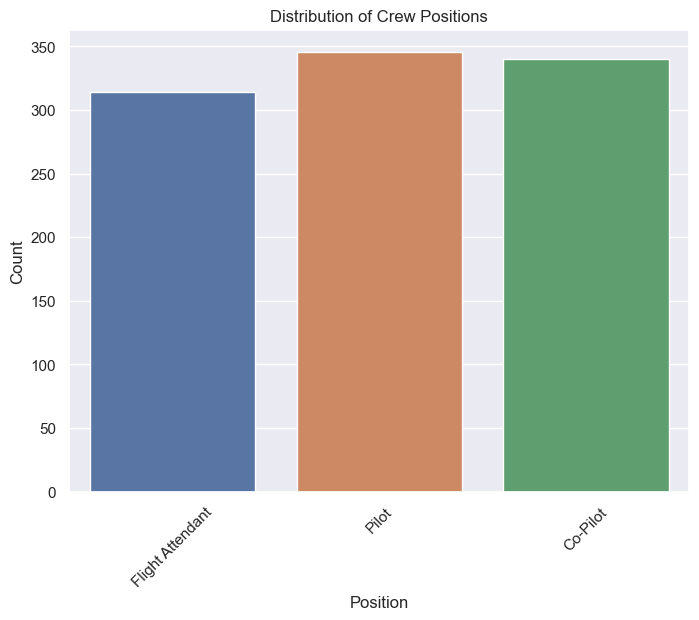

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution of crew positions
plt.figure(figsize=(8, 6))
sns.countplot(data=crew_data, x='Position')
plt.title('Distribution of Crew Positions')
plt.xlabel('Position')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


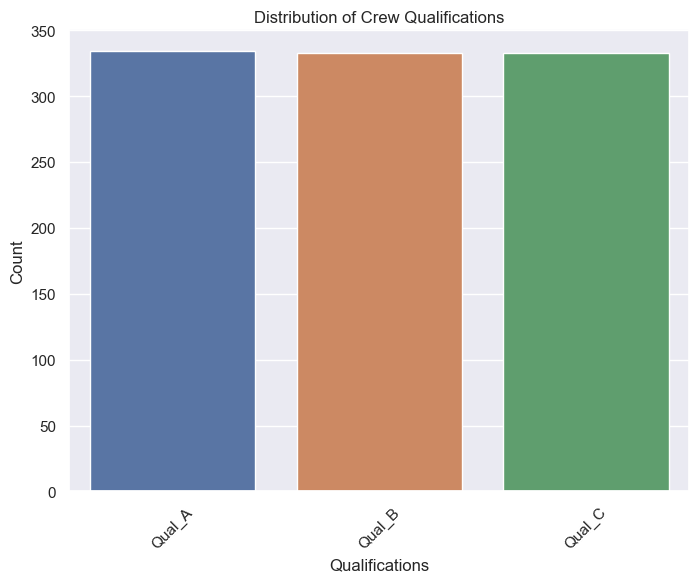

In [18]:
# Plot distribution of qualifications
plt.figure(figsize=(8, 6))
sns.countplot(data=crew_data, x='Qualifications')
plt.title('Distribution of Crew Qualifications')
plt.xlabel('Qualifications')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


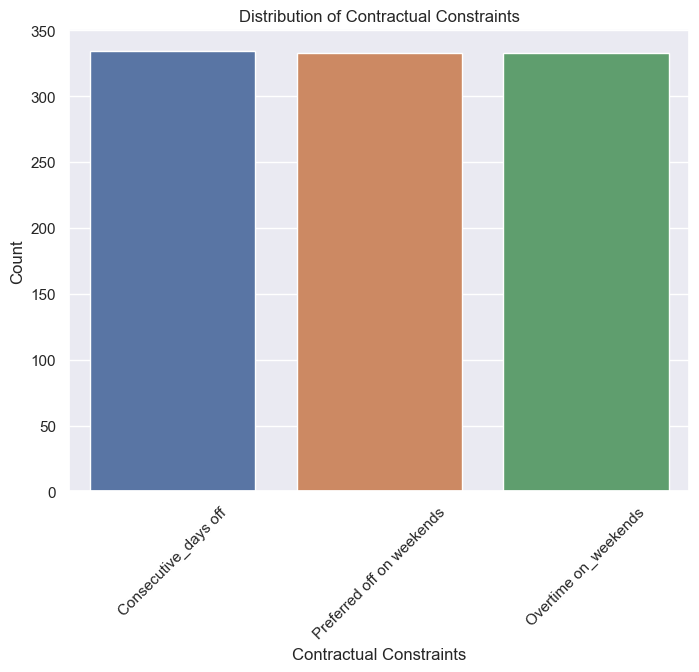

In [19]:
# Plot distribution of contractual constraints
plt.figure(figsize=(8, 6))
sns.countplot(data=crew_data, x='ContractualConstraints')
plt.title('Distribution of Contractual Constraints')
plt.xlabel('Contractual Constraints')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [20]:
import pandas as pd
df=pd.read_csv('flights_data.csv')
df.head()
df.dtypes

FlightNumber         int64
DepartureAirport    object
ArrivalAirport      object
DepartureTime       object
ArrivalTime         object
AircraftType        object
Duration             int64
Status              object
dtype: object

In [21]:
df.shape

(5000, 8)

In [22]:
duplicate_row_df=df[df.duplicated()]
print('number_of_duplictes',duplicate_row_df.shape)

number_of_duplictes (0, 8)


In [23]:
print(df.isnull().sum())

FlightNumber        0
DepartureAirport    0
ArrivalAirport      0
DepartureTime       0
ArrivalTime         0
AircraftType        0
Duration            0
Status              0
dtype: int64


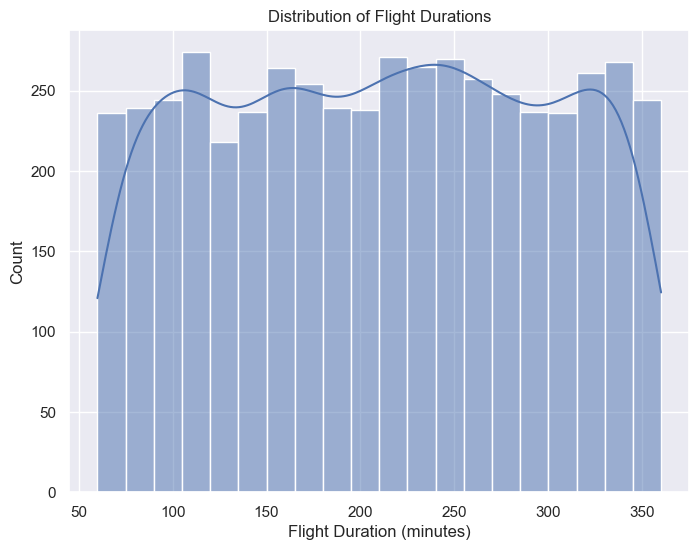

In [26]:
# Plot distribution of flight durations
plt.figure(figsize=(8, 6))
sns.histplot(data=flights_data, x='Duration', bins=20, kde=True)
plt.title('Distribution of Flight Durations')
plt.xlabel('Flight Duration (minutes)')
plt.ylabel('Count')
plt.show()


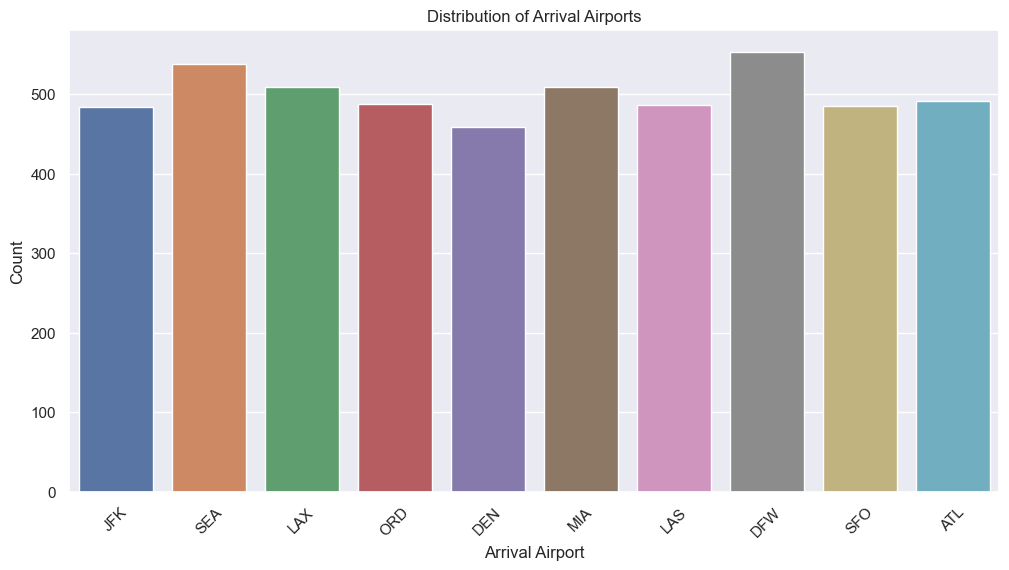

In [27]:

plt.figure(figsize=(12, 6))
sns.countplot(data=flights_data, x='ArrivalAirport')
plt.title('Distribution of Arrival Airports')
plt.xlabel('Arrival Airport')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


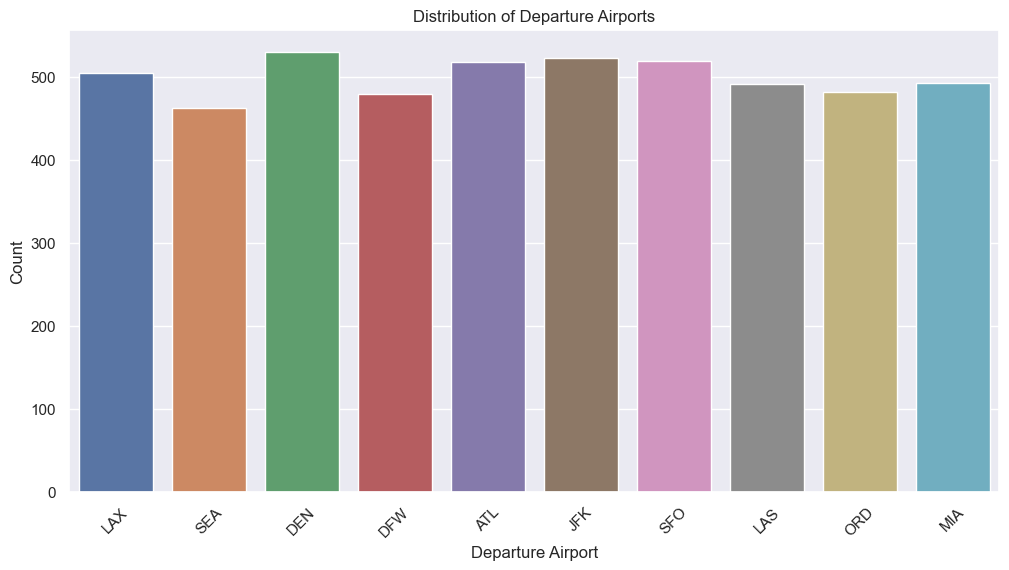

In [28]:
# Plot distribution of departure airports
plt.figure(figsize=(12, 6))
sns.countplot(data=flights_data, x='DepartureAirport')
plt.title('Distribution of Departure Airports')
plt.xlabel('Departure Airport')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [29]:
import pandas as pd
df=pd.read_csv('assignments_data.csv')
df.head()
df.dtypes

CrewID            int64
FlightNumber      int64
DutyStartTime    object
DutyEndTime      object
DutyType         object
Status           object
dtype: object

In [30]:
df.shape

(20059, 6)

In [31]:
duplicate_row_df=df[df.duplicated()]
print('number_of_duplictes',duplicate_row_df.shape)

number_of_duplictes (0, 6)


In [33]:
df.count()

CrewID           20059
FlightNumber     20059
DutyStartTime    20059
DutyEndTime      20059
DutyType         20059
Status           20059
dtype: int64

In [34]:
print(df.isnull().sum())

CrewID           0
FlightNumber     0
DutyStartTime    0
DutyEndTime      0
DutyType         0
Status           0
dtype: int64


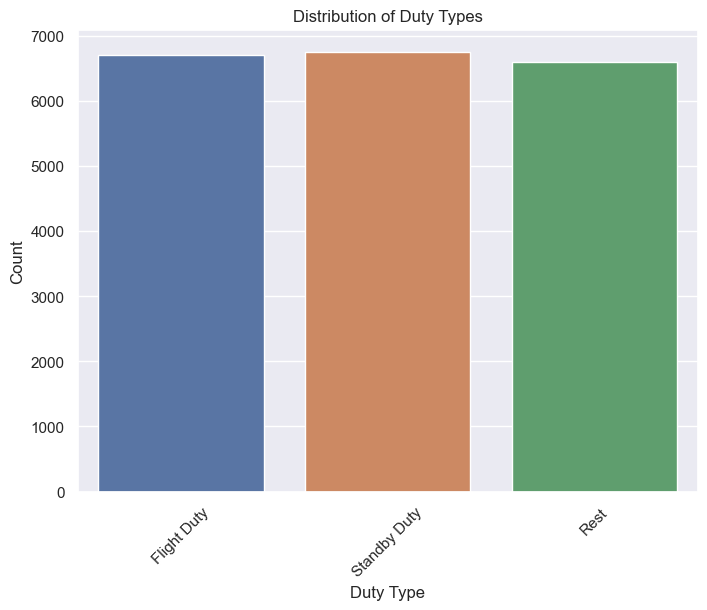

In [38]:
plt.figure(figsize=(8, 6))
sns.countplot(data=assignments_data, x='DutyType')
plt.title('Distribution of Duty Types')
plt.xlabel('Duty Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

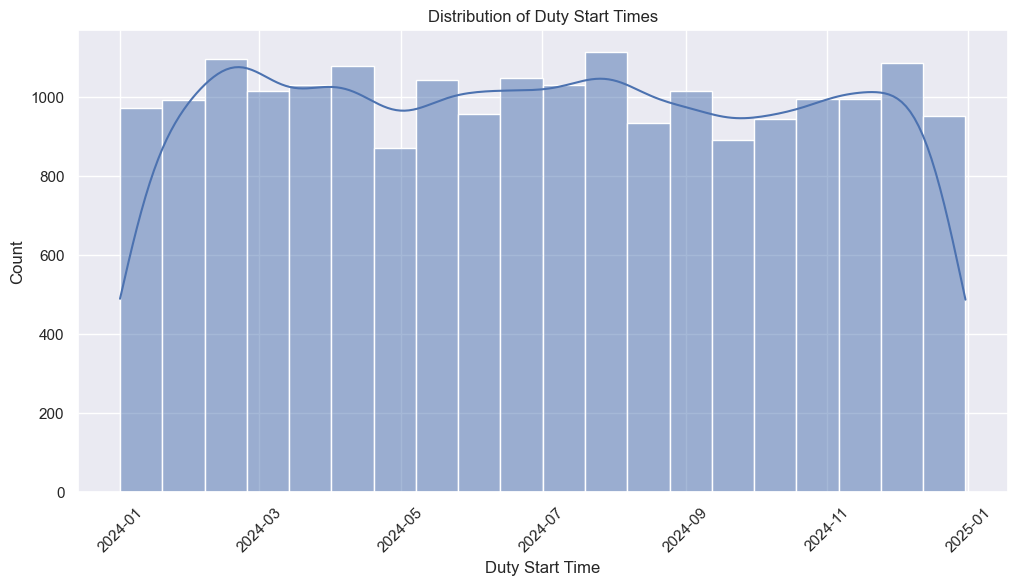

In [39]:

plt.figure(figsize=(12, 6))
sns.histplot(data=assignments_data, x='DutyStartTime', bins=20, kde=True)
plt.title('Distribution of Duty Start Times')
plt.xlabel('Duty Start Time')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


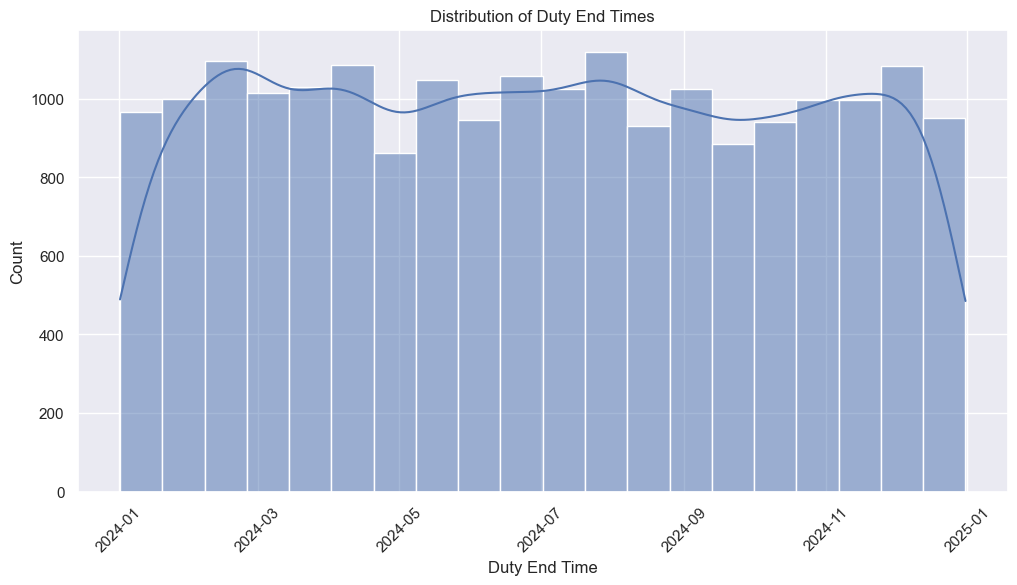

In [40]:

plt.figure(figsize=(12, 6))
sns.histplot(data=assignments_data, x='DutyEndTime', bins=20, kde=True)
plt.title('Distribution of Duty End Times')
plt.xlabel('Duty End Time')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [49]:
import pandas as pd
df=pd.read_csv('regulatory_data.csv')
df.head()
df.dtypes

RequirementID         int64
MaxDutyTime          object
MinRestPeriod        object
OtherRegulations    float64
dtype: object

In [51]:
df = df.drop(['OtherRegulations'], axis='columns')
df

,RequirementID,MaxDutyTime,MinRestPeriod
0,1,12 hours,9 hours
1,2,13 hours,11 hours
2,3,12 hours,12 hours
3,4,8 hours,12 hours
4,5,10 hours,10 hours
...,...,...,...
995,996,8 hours,10 hours
996,997,10 hours,11 hours
997,998,13 hours,11 hours
998,999,12 hours,11 hours


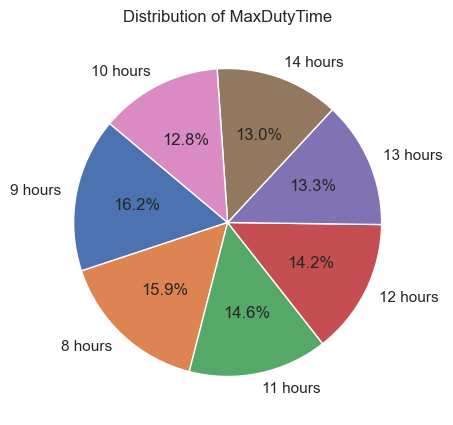

In [57]:
import matplotlib.pyplot as plt
MaxDutyTime_counts = regulatory_data['MaxDutyTime'].value_counts()
plt.figure(figsize=(5, 5))
plt.pie(MaxDutyTime_counts, labels=MaxDutyTime_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of MaxDutyTime')
plt.show()


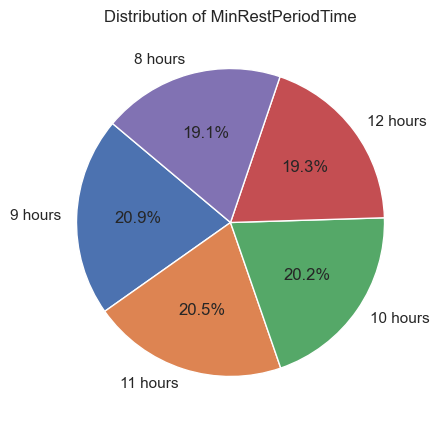

In [60]:
import matplotlib.pyplot as plt
MinRestPeriod_counts = regulatory_data['MinRestPeriod'].value_counts()
plt.figure(figsize=(5, 5))
plt.pie(MinRestPeriod_counts, labels=MinRestPeriod_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of MinRestPeriodTime')
plt.show()


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
assignments_data = pd.read_csv('assignments_data.csv')
X = assignments_data[['DutyStartTime', 'DutyEndTime', 'DutyType']]
y = (assignments_data['Status'] == 'Assigned').astype(int)  

In [3]:
X = pd.get_dummies(X, drop_first=True)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
print(len(X_train))

16047


In [6]:
print(len(X_test))

4012


In [7]:
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [8]:
decision_tree.score(X_test,y_test)

1.0

In [9]:
y_pred = decision_tree.predict(X_test)

In [10]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [11]:
assignment_status = decision_tree.predict(X_test)
if (assignment_status == 1).all():
    print("All crew members are assigned and available for the flight.")
else:
    print("Not all crew members are assigned for the flight.")


All crew members are assigned and available for the flight.


In [12]:
if (assignment_status == 1).any():
    print("At least one crew member is assigned and available for the flight.")
else:
    print("No crew member is assigned for the flight.")


At least one crew member is assigned and available for the flight.
